**IMPORT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**UPLOAD THE DATASET**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


**LOAD THE DATASET**

In [3]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
print(df.head())


(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

**CHECK DATASET INFO**

In [4]:
#basic info about the dataset
print(df.shape)   # rows and columns
print(df.columns) # column names
df.info()         # data types


(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14

**LOOK AT FIRST FEW ROWS**

In [5]:
# Preview first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**CHECK CLASS IMBALANCE**

Class
0    284315
1       492
Name: count, dtype: int64


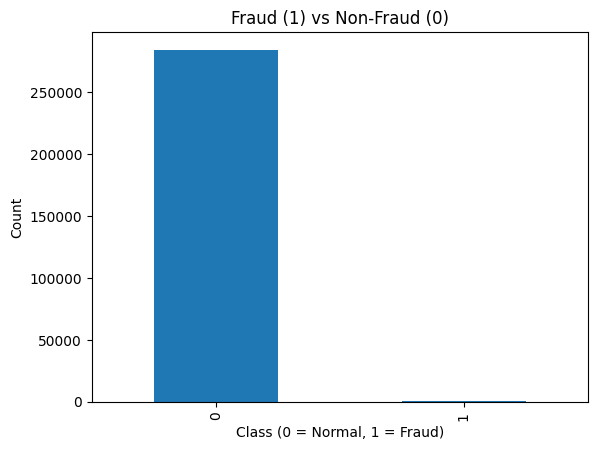

In [6]:
# Count fraud (1) vs non-fraud (0)
print(df['Class'].value_counts())

# Plot the imbalance
import matplotlib.pyplot as plt
df['Class'].value_counts().plot(kind='bar', title='Fraud (1) vs Non-Fraud (0)')
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


**COMPARE AVERAGE TRANSACTION AMOUNT**

In [7]:
print("Average Fraud Amount:", df[df['Class']==1]['Amount'].mean())
print("Average Normal Amount:", df[df['Class']==0]['Amount'].mean())


Average Fraud Amount: 122.21132113821139
Average Normal Amount: 88.29102242231328


**PLOT AMOUNT DISTRIBUTIONS**

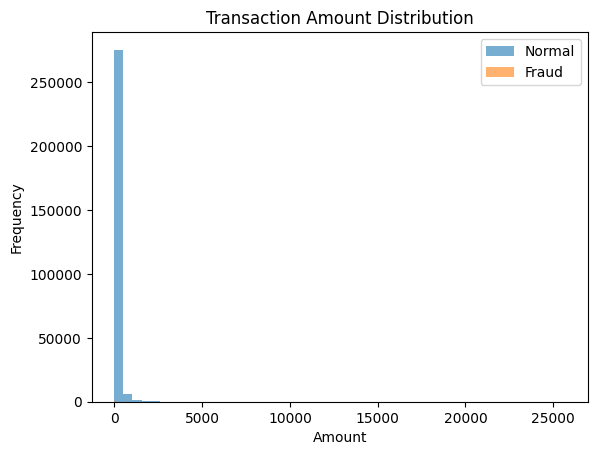

In [8]:
fraud = df[df['Class']==1]['Amount']
normal = df[df['Class']==0]['Amount']

plt.hist(normal, bins=50, alpha=0.6, label='Normal')
plt.hist(fraud, bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


**SPLIT DATA INTO TRAIN & TEST**

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)   # features (everything except Class)
y = df['Class']                # target (fraud or not)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (227845, 30)
Test size: (56962, 30)


**MODEL TRAINING & EVALUATION**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.9533707528453137
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.73      0.83        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**CONFUSION MATRIX**

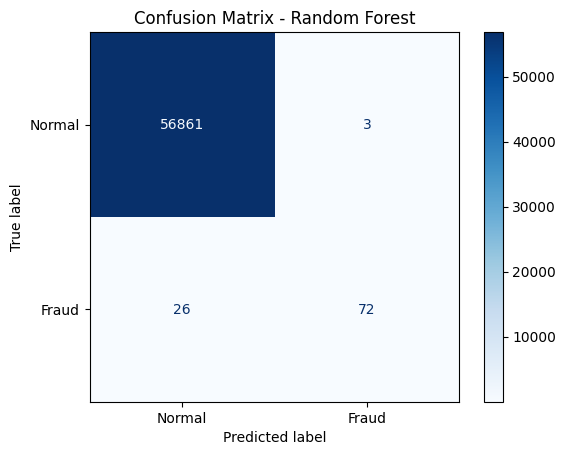

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal","Fraud"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


**PRECISION-RECALL-CURVE**

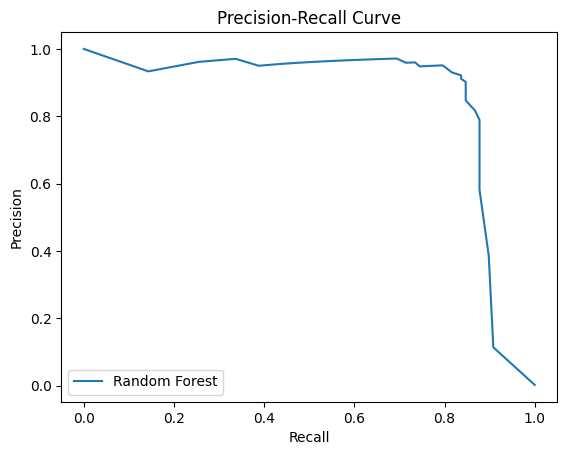

In [12]:
from sklearn.metrics import precision_recall_curve

prec, rec, thr = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


**FEATURE IMPORTANCE**

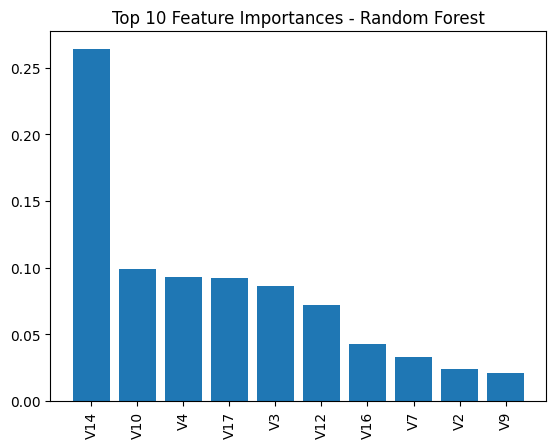

In [13]:
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1][:10]  # top 10 features

plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()
